# Classical machine learning

label     int64
text     object
dtype: object (34152, 2)


,label,text
0,0,donald trump sends out embarrassing new year‚s...
1,0,drunk bragging trump staffer started russian c...
2,0,sheriff david clarke becomes an internet joke ...
3,0,trump is so obsessed he even has obama‚s name ...
4,0,pope francis just called out donald trump duri...


label    0
text     0
dtype: int64
Unique label values: [0 1]
Empty texts: 0
Duplicated entries: 1946


(32206, 2)

label
1    16181
0    16025
Name: count, dtype: int64


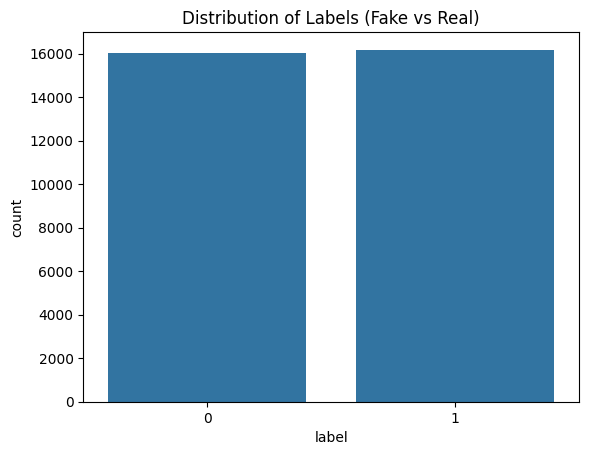

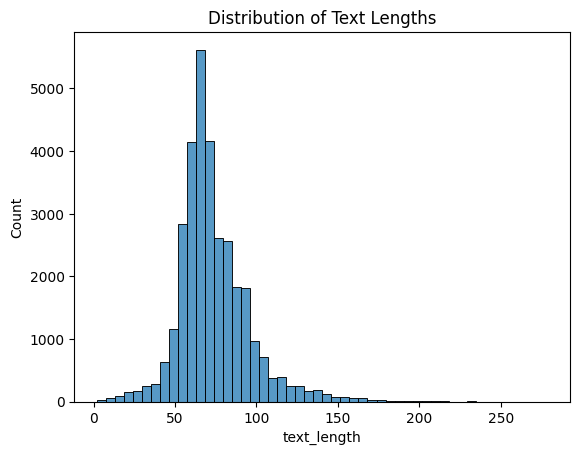

In [1]:
# import and run all cells of the preprocessing file

import nbformat
from IPython.core.interactiveshell import InteractiveShell

with open('preprocessing.ipynb') as f:
    nb = nbformat.read(f, as_version=4)

shell = InteractiveShell.instance()
for cell in nb.cells:
    if cell.cell_type == 'code':
        shell.run_cell(cell.source)

## Feature extraction

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text data into TF-IDF features using unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1,2))
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)


## Model training

### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logr_model = LogisticRegression()
logr_model.fit(X_train, y_train)

y_pred_train = logr_model.predict(X_train)
y_pred = logr_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train Accuracy: 0.9684443409408477
Accuracy: 0.9043775225085378

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3159
           1       0.95      0.86      0.90      3283

    accuracy                           0.90      6442
   macro avg       0.91      0.91      0.90      6442
weighted avg       0.91      0.90      0.90      6442


Confusion Matrix:
 [[3001  158]
 [ 458 2825]]


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=0)
rf_model.fit(X_train, y_train)

y_pred_train = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train Accuracy: 1.0
Accuracy: 0.886215461036945

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89      3159
           1       0.92      0.85      0.88      3283

    accuracy                           0.89      6442
   macro avg       0.89      0.89      0.89      6442
weighted avg       0.89      0.89      0.89      6442


Confusion Matrix:
 [[2907  252]
 [ 481 2802]]


### Linear SVC

In [31]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svc_model = LinearSVC(C=0.1, random_state=0, max_iter=10000, loss="squared_hinge")
svc_model.fit(X_train, y_train)

y_pred_train = svc_model.predict(X_train)
y_pred = svc_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Train Accuracy: 0.972442167365316
Accuracy: 0.9063955293387147

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      3159
           1       0.95      0.87      0.90      3283

    accuracy                           0.91      6442
   macro avg       0.91      0.91      0.91      6442
weighted avg       0.91      0.91      0.91      6442


Confusion Matrix:
 [[2999  160]
 [ 443 2840]]


### Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_train = nb_model.predict(X_train)
y_pred = nb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train Accuracy: 0.9809035863996274
Accuracy: 0.8775225085377212

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.98      0.89      3159
           1       0.98      0.78      0.87      3283

    accuracy                           0.88      6442
   macro avg       0.89      0.88      0.88      6442
weighted avg       0.90      0.88      0.88      6442


Confusion Matrix:
 [[3100   59]
 [ 730 2553]]


### Gradient Boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, max_depth=5, learning_rate=0.1)
gb_model.fit(X_train, y_train)

y_pred_train = gb_model.predict(X_train)
y_pred = gb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train Accuracy: 0.8665968017388604
Accuracy: 0.7938528407326917

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      3159
           1       0.76      0.88      0.81      3283

    accuracy                           0.79      6442
   macro avg       0.80      0.79      0.79      6442
weighted avg       0.80      0.79      0.79      6442


Confusion Matrix:
 [[2239  920]
 [ 408 2875]]


### XGBoost

In [20]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb_model = XGBClassifier(eval_metric='logloss', n_estimators=100, learning_rate=0.1, n_jobs=-1)
xgb_model.fit(X_train, y_train)

y_pred_train = xgb_model.predict(X_train)
y_pred = xgb_model.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_pred_train))

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Train Accuracy: 0.8625989753143922
Accuracy: 0.7924557590810307

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76      3159
           1       0.75      0.90      0.81      3283

    accuracy                           0.79      6442
   macro avg       0.81      0.79      0.79      6442
weighted avg       0.80      0.79      0.79      6442


Confusion Matrix:
 [[2165  994]
 [ 343 2940]]


## Predictions

In [ ]:
import numpy as np

test_data = pd.read_csv("../dataset/testing_data_lowercase_nolabels.csv", usecols=[1], header=None, names=["label", "text"], sep="\t")

# Apply the same text preprocessing pipeline used during training
test_data["text"] = test_data["text"].apply(text_preprocessing_pipeline)

# Transform the preprocessed test text data into TF-IDF feature vectors using the same vectorizer as in training
X_test_vec = vectorizer.transform(test_data["text"])

predictions_logr = logr_model.predict(X_test_vec)
predictions_rf = rf_model.predict(X_test_vec)
prediction_svc = svc_model.predict(X_test_vec)
prediction_nb = nb_model.predict(X_test_vec)
prediction_gb = gb_model.predict(X_test_vec)
preiction_xgb = xgb_model.predict(X_test_vec)

# Count the occurrences of each predicted label
unique_logr, counts_logr = np.unique(predictions_logr, return_counts=True)
unique_rf, counts_rf = np.unique(predictions_rf, return_counts=True)
unique_svc, counts_svc = np.unique(prediction_svc, return_counts=True)
unique_nb, counts_nb = np.unique(prediction_nb, return_counts=True)
unique_gb, counts_gb = np.unique(prediction_gb, return_counts=True)
unique_xgb, counts_xgb = np.unique(preiction_xgb, return_counts=True)

print("Prediction Logistic Regression:", unique_logr, counts_logr)
print("Prediction Random Forest:", unique_rf, counts_rf)
print("Prediction Linear SVC:", unique_svc, counts_svc)
print("Prediction Naive Bayes:", unique_nb, counts_nb)
print("Prediction Gradient Boosting:", unique_gb, counts_gb)
print("Prediction XGB Boost:", unique_xgb, counts_xgb)

Prediction Logistic Regression: [0 1] [4655 5329]
Prediction Random Forest: [0 1] [4890 5094]
Prediction Linear SVC: [0 1] [4739 5245]
Prediction Naive Bayes: [0 1] [4821 5163]
Prediction Gradient Boosting: [0 1] [3453 6531]
Prediction XGB Boost: [0 1] [3237 6747]


## Save predictions to file

In [35]:
# Load test data, combine predictions with text, and save to a TSV file without headers or index
test_data = pd.read_csv("../dataset/testing_data_lowercase_nolabels.csv", usecols=[1], header=None, names=["text"], sep="	")

labels_df = pd.DataFrame(prediction_svc, columns=[0])
text_df = test_data[["text"]]

output_df = pd.concat([labels_df, text_df], axis=1)

output_df.to_csv("../predictions/G5-predictions.csv", index=False, header=None, sep="	")